In [2]:
%reload_ext autoreload
%autoreload 2

In [7]:
import sys
sys.path.append('..')
import numpy as np
import networkqit as nq
import networkx as nx
import seaborn as sns
import numdifftools as nd
from numpy.random import random as rand
from networkqit import graph_laplacian as GL
from scipy.linalg import eigvalsh
from scipy.special import logsumexp
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [13]:
def ER(n,p):
    return (1.0-np.eye(n))*p

def LER(n,p):
    return GL(ER(n,p))

def ptilde(Lobs,beta):
    n = Lobs.shape[0]
    R = np.sum(nq.compute_vonneuman_density(Lobs,beta))
    return 1/(n*beta)*np.log((R*(n-1))/(n-R))

In [34]:
N,pstar = 40, 0.9
Lobs = LER(N,pstar)
#Lobs = GL(nx.to_numpy_array(nx.karate_club_graph()))
N=len(Lobs)
#pstar=nx.density(nx.karate_club_graph())

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


ValueError: array must not contain infs or NaNs

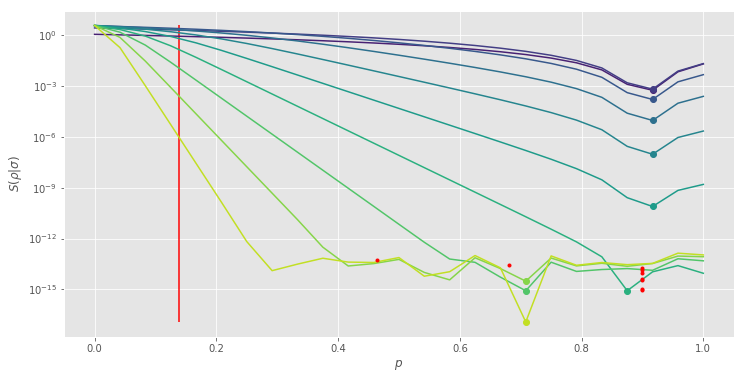

In [40]:
allp=np.linspace(0.0,1.0,25)
beta_range = np.logspace(-1,0.5,10)
cmap = sns.color_palette('viridis',len(beta_range))
plt.figure(figsize=(12,6))
allS = []

for i,beta in enumerate(beta_range):
    S = []
    for p in allp:
        dkl = nq.SpectralDivergence(Lobs=Lobs, Lmodel=LER(N,p), beta=beta).rel_entropy
        S.append(dkl)
        allS.append(dkl)
    plt.semilogy(allp, S, color=cmap[i])
    
for i,beta in enumerate(beta_range):
    S = []
    for p in allp:
        dkl = nq.SpectralDivergence(Lobs=Lobs, Lmodel=LER(N,p), beta=beta).rel_entropy
        S.append(dkl)
        allS.append(dkl)
    iminbeta = np.argmin(S)
    plt.plot(allp[iminbeta],np.min(S),color=cmap[i],marker='o')
    
plt.vlines(nx.density(nx.karate_club_graph()),ymin=np.min(allS),ymax=np.max(allS),color='r')
plt.ylabel('$S(\\rho \\| \\sigma)$')
plt.xlabel('$p$')

for beta in beta_range:
    popt = ptilde(Lobs,beta)
    dkl = nq.SpectralDivergence(Lobs=Lobs, Lmodel=LER(N,popt), beta=beta).rel_entropy
    plt.plot(ptilde(Lobs,beta),dkl,'r.')
#from matplotlib2tikz import save as tikz_save
#tikz_save('minimum_entropy.tex')

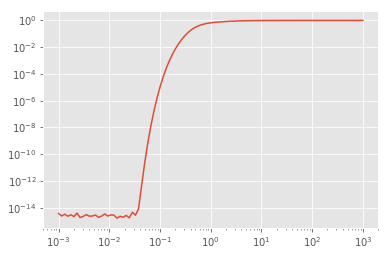

In [44]:
XY=np.loadtxt('/home/carlo2/workspace/qit/doc/images/random_degrees_ensemble_n_40.txt')
plt.loglog(XY[0:100,0],np.abs(XY[0:100,1]))

In [ ]:
XY=np.loadtxt('/home/carlo2/workspace/qit/doc/images/random_degrees_ensemble_n_40.txt')
plt.loglog(XY[0:100,0],np.abs(XY[0:100,1]))